<a href="https://colab.research.google.com/github/mipypf/practical-mi-guide/blob/develop/chapter3/src/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 探索的データ分析（EDA）を実行

### 右上の「接続」をクリックし、ランタイムに接続

## ライブラリをインストール

In [1]:
! pip uninstall -y thinc spacy fastai # 競合するライブラリを削除
! pip install scikit-learn==1.3.2 #ライブラリのverによっては次元圧縮の挙動が異なることがあるため注意
! pip install numpy==1.26.4
! pip install pandas==2.2.2
! pip install matplotlib==3.10.0
! pip install japanize_matplotlib==1.1.3
! pip install adjustText==1.2.0
! pip install umap-learn==0.5.5

Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5
Found existing installation: fastai 2.7.19
Uninstalling fastai-2.7.19:
  Successfully uninstalled fastai-2.7.19
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ...

### 「ランタイム」タブから「セッションを再起動する」を選択し、「はい」をクリック

## Google Colabの準備

In [1]:
# Google Colabを利用する場合はTrue、そうでない場合はFalseとする
colab = True

In [2]:
# Google Colabの左端のファイル（ファイルのアイコン）をクリックし、chapter3_demo_data_postprocess.csvをドラッグ＆ドロップしてアップロード
if colab:
  INPUT_FILE_PATH = "./"
  OUTPUT_FILE_PATH = "./"
else:
  INPUT_FILE_PATH = "../input/"
  OUTPUT_FILE_PATH = "../output/"

## ライブラリをインポート

In [3]:
import warnings

warnings.filterwarnings("ignore")

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from adjustText import adjust_text
from pandas import json_normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

## グラフ表示の際のフォント種類やフォントサイズを設定（任意）

In [4]:
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["font.family"] = "IPAexGothic"

## ファイルのコンフィグ情報を定義

In [5]:
class CFG:
    input_dir = INPUT_FILE_PATH
    output_dir = OUTPUT_FILE_PATH
    random_seed = 42
    exp_no = "eda"

## データを読み込み、データフレームに格納

In [6]:
train_df = pd.read_csv(f"{CFG.input_dir}/chapter3_demo_data_postprocess.csv")
train_df

,サンプルID,サンプル作製日,担当者,備考,材料１,材料２,材料３,材料４,材料５,材料６,...,乾燥温度,乾燥時間,擦過回数,擦過圧力,耐擦過性,画像濃度,粘度,表面張力,保存後粘度,保存後状態
0,DP_001,2024/1/19,高岡,NaN,46.9,40,0,2,0,2.0,...,25,NaN,10,5,2.4,1.06,9.0,35,NaN,NaN
1,DP_002,2024/1/19,高岡,NaN,47.4,40,0,2,0,1.5,...,25,NaN,10,5,2.4,1.07,9.0,38,NaN,NaN
2,DP_003,2024/1/19,高岡,NaN,47.7,40,0,2,0,1.2,...,25,NaN,10,5,2.4,1.07,9.0,40,NaN,NaN
3,DP_004,2024/1/19,高岡,NaN,47.9,40,0,2,0,1.0,...,25,NaN,10,5,2.4,1.08,9.0,41,NaN,NaN
4,DP_005,2024/1/19,高岡,NaN,48.4,40,0,2,0,0.5,...,25,NaN,10,5,2.4,1.09,9.0,44,NaN,NaN
5,DP_006,2024/1/30,福原,ref,47.4,40,0,2,0,1.5,...,25,NaN,10,5,2.7,1.07,9.1,38,NaN,NaN
6,DP_007,2024/1/30,福原,NaN,47.4,40,0,2,0,0.0,...,25,NaN,10,5,2.7,1.05,9.1,37,NaN,NaN
7,DP_008,2024/1/30,福原,NaN,47.4,40,0,2,0,0.0,...,25,NaN,10,5,2.7,1.02,9.1,39,NaN,NaN
8,DP_009,2024/1/30,福原,NaN,45.4,40,0,2,0,1.5,...,25,NaN,10,5,3.1,1.07,10.3,36,NaN,NaN
9,DP_010,2024/1/30,福原,NaN,43.4,40,0,2,0,1.5,...,25,NaN,10,5,3.6,1.07,11.5,34,NaN,NaN


## データの列名を確認

In [7]:
# train_dfの列名をリストで取得
columns = train_df.columns
# train_dfの列名を表示
columns

Index(['サンプルID', 'サンプル作製日', '担当者', '備考', '材料１', '材料２', '材料３', '材料４', '材料５',
       '材料６', '材料７', '材料８', '材料９', '材料１０', '材料１１', '材料１２', '材料１３', '塗布量',
       '乾燥方式', '乾燥温度', '乾燥時間', '擦過回数', '擦過圧力', '耐擦過性', '画像濃度', '粘度', '表面張力',
       '保存後粘度', '保存後状態'],
      dtype='object')

## データの欠損を確認

In [8]:
# 欠損のある列を表示
train_df.isnull().sum()

,0
サンプルID,0
サンプル作製日,0
担当者,0
備考,30
材料１,0
材料２,0
材料３,0
材料４,0
材料５,0
材料６,0


## 使用する説明変数をリストとして定義

In [9]:
# 使用しない説明変数はコメントアウト

numeric_parameter_cols = [
    # 'サンプルID',
    # 'サンプル名',
    # 'サンプル作成日',
    # '担当者',
    # '備考',
    "材料１",
    "材料２",
    "材料３",
    "材料４",
    "材料５",
    "材料６",
    "材料７",
    "材料８",
    "材料９",
    "材料１０",
    "材料１１",
    "材料１２",
    "材料１３",
    "塗布量",
    "乾燥方式",
    "乾燥温度",
    # '乾燥時間',
    "擦過回数",
    "擦過圧力",
    # '耐擦過性','画像濃度', '粘度', '表面張力', '保存後粘度'
]

## 目的変数をリストとして定義

In [10]:
objective_cols = ["耐擦過性", "画像濃度", "粘度", "表面張力", "保存後粘度"]

## 目的変数ごとにヒストグラムを作成し、分布を確認

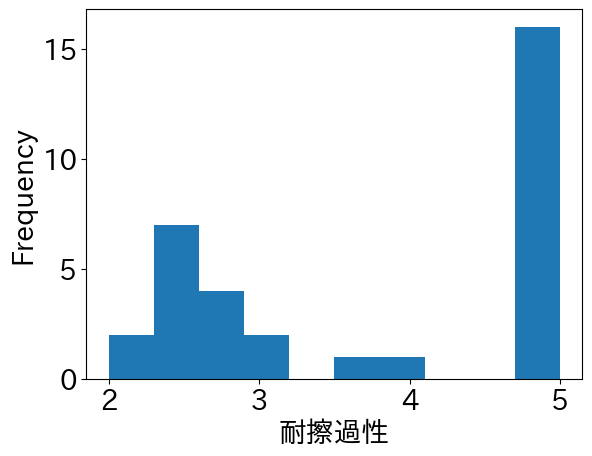

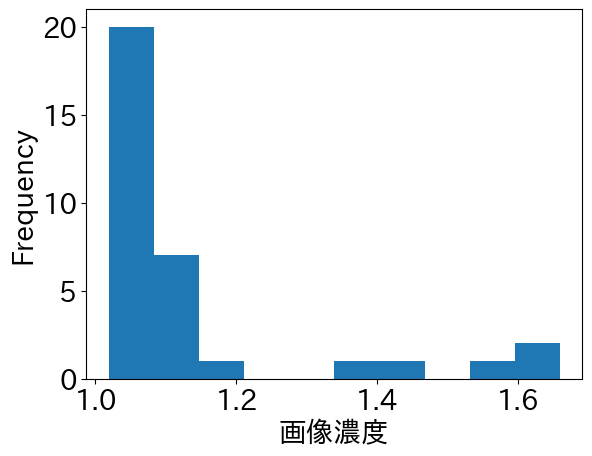

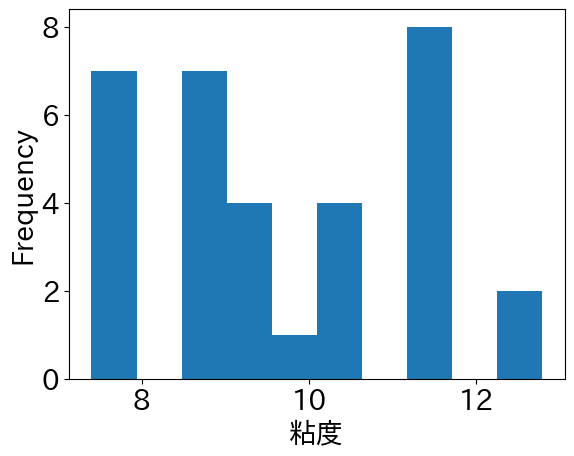

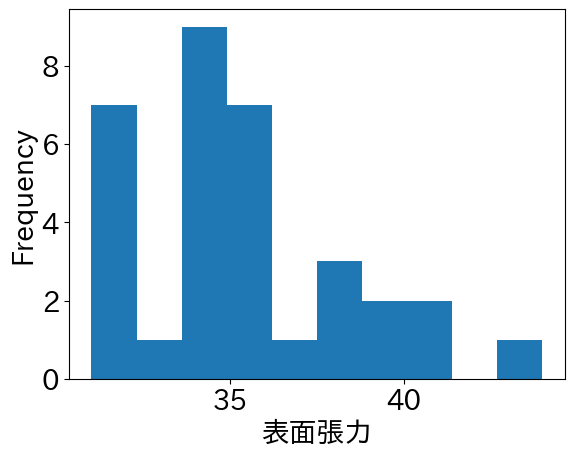

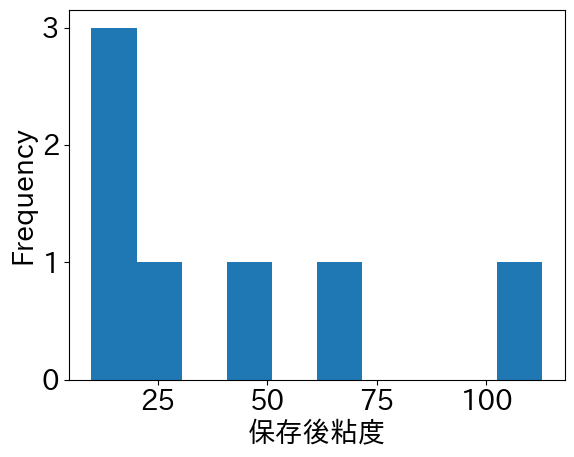

In [11]:
for col in objective_cols:
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 説明変数ごとにヒストグラムを作成し、分布を確認

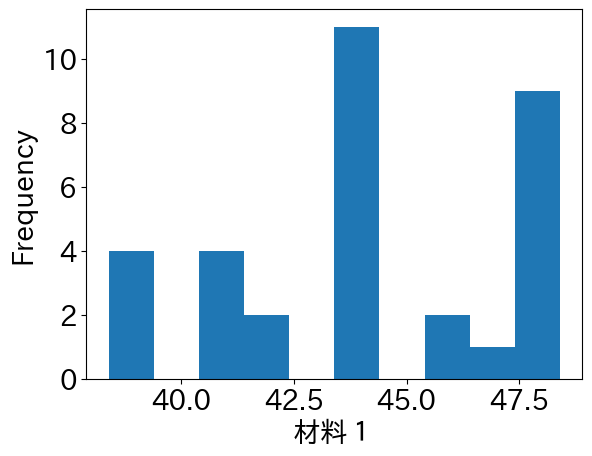

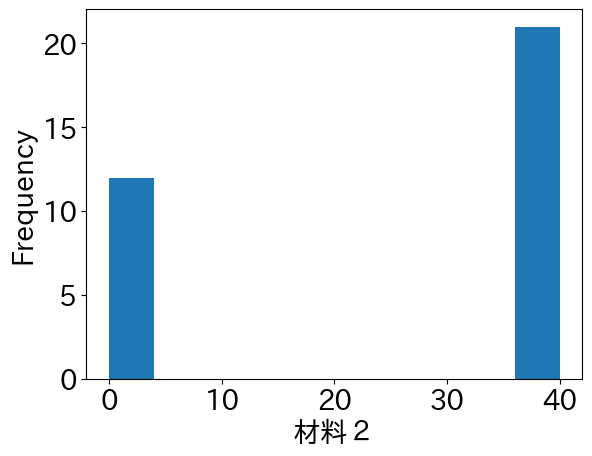

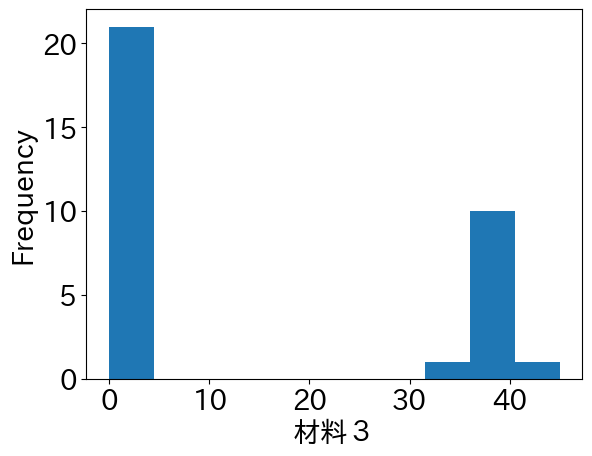

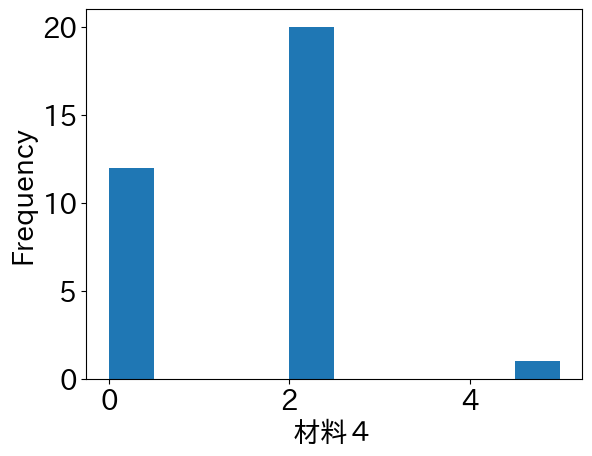

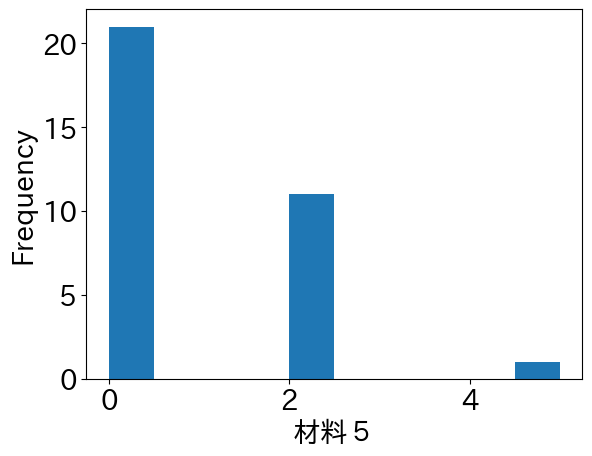

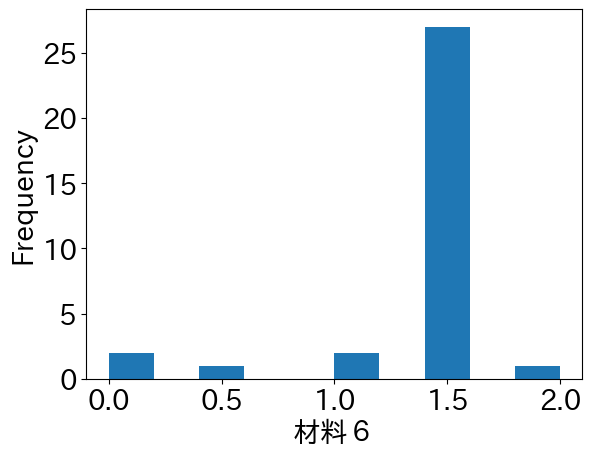

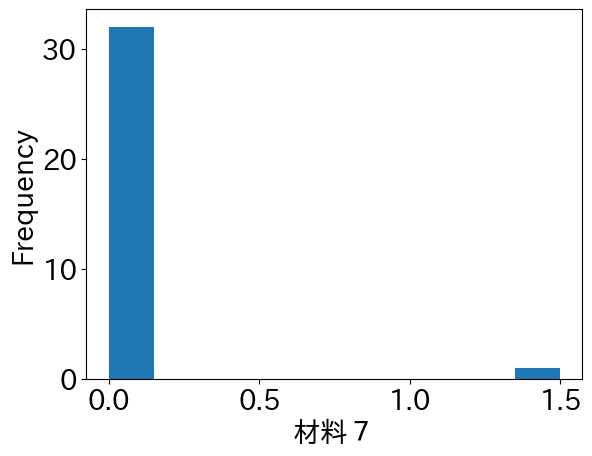

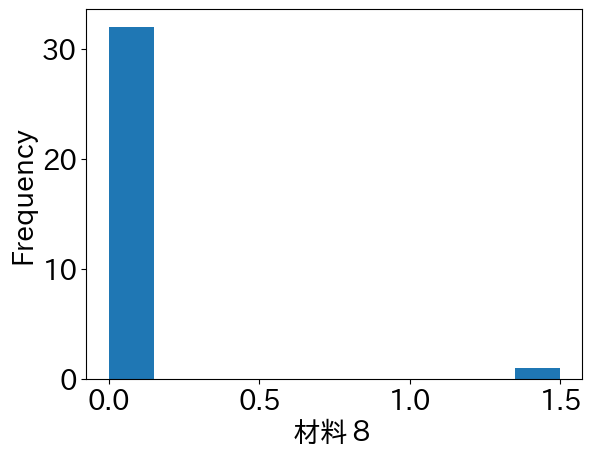

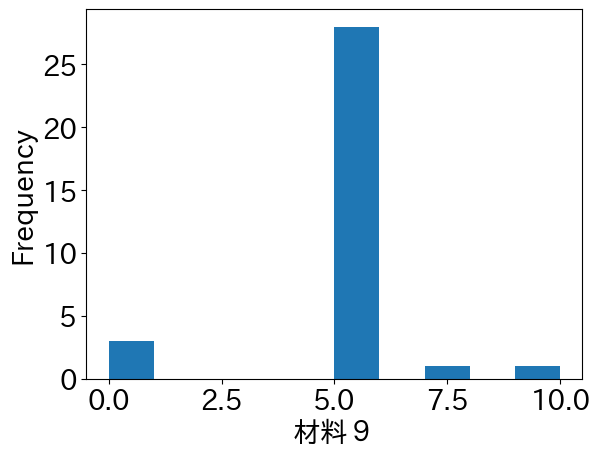

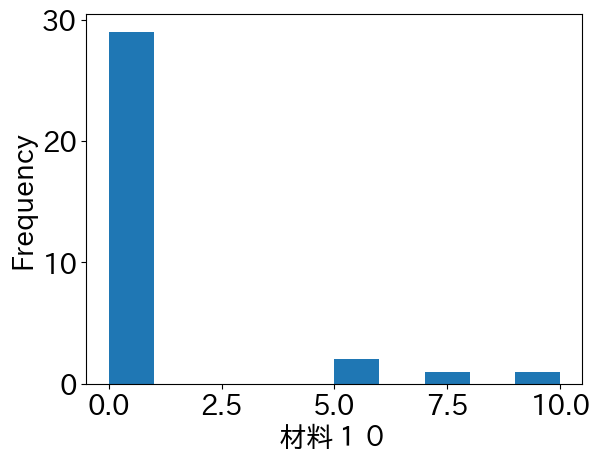

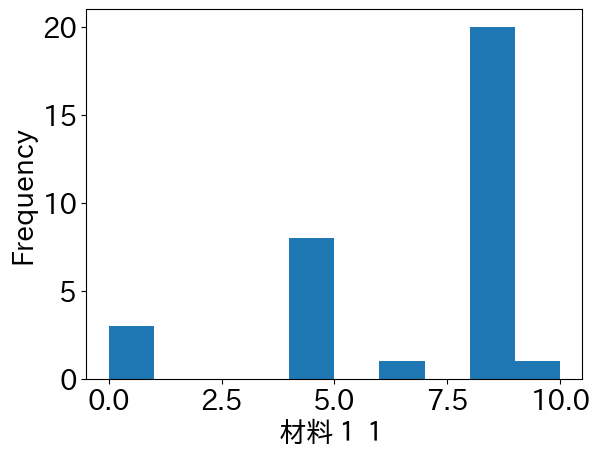

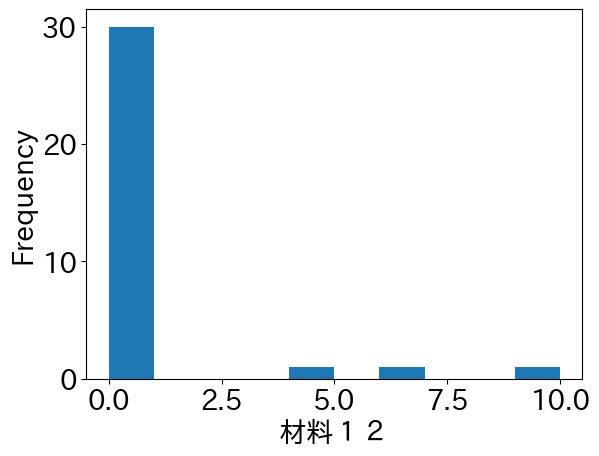

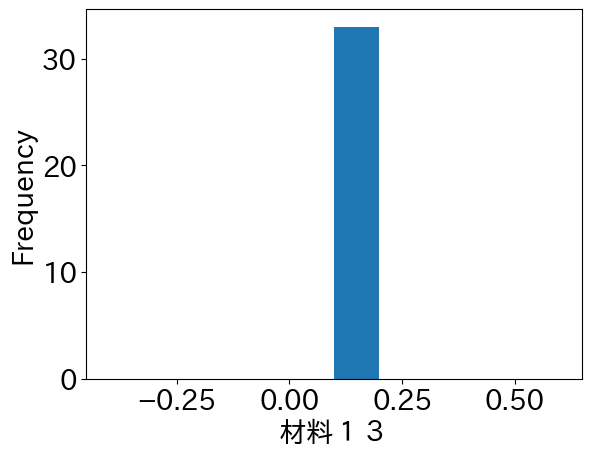

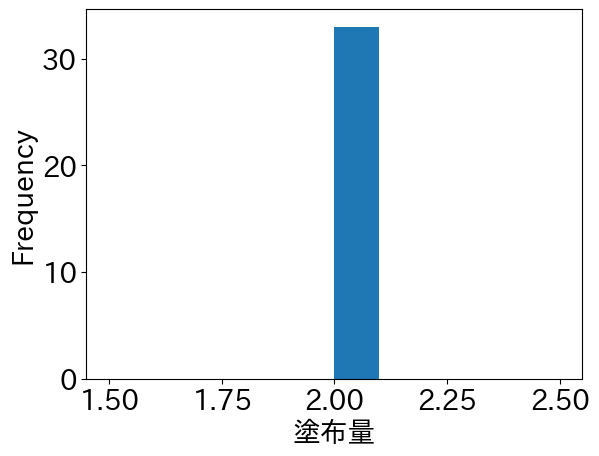

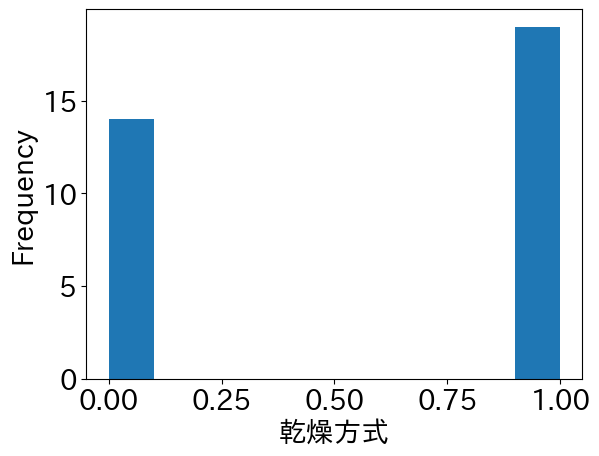

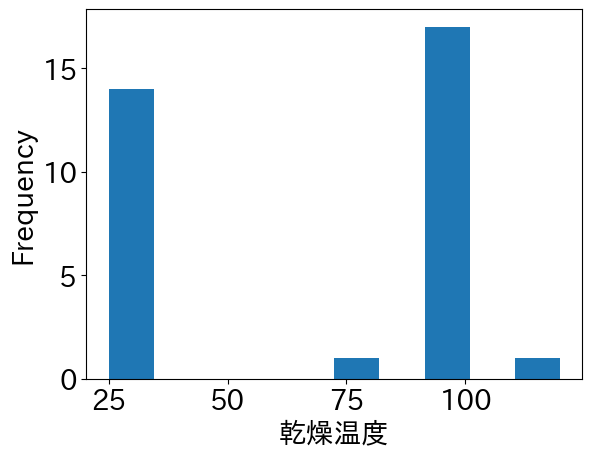

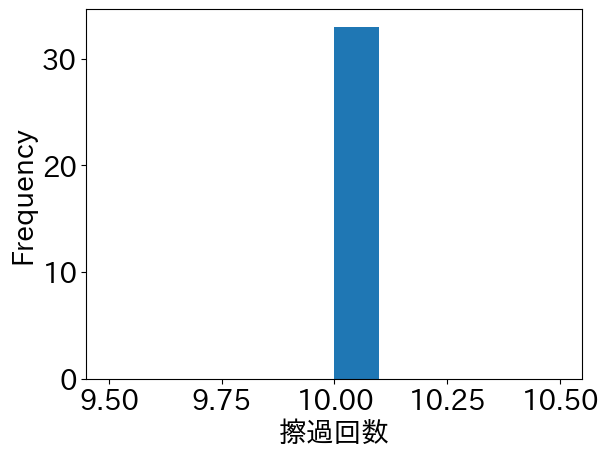

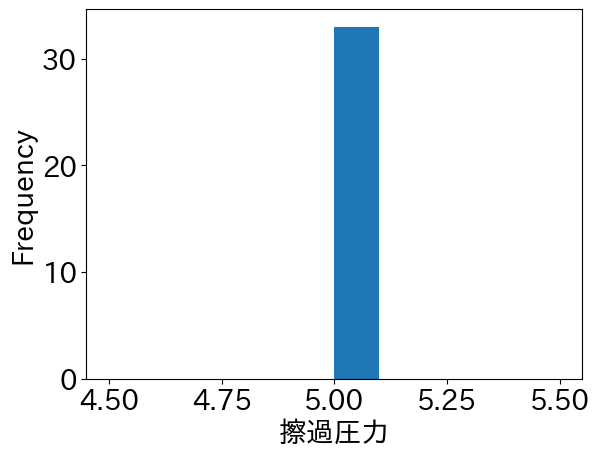

In [12]:
for col in numeric_parameter_cols:
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 説明変数のスケーリング

In [13]:
# スケーラーを定義
scaler_x = StandardScaler()
# スケーラーを適用
X_train = scaler_x.fit_transform(train_df[numeric_parameter_cols])
X_train

array([[ 1.00830673,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         1.53976945, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.16797142,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         0.31831772, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.26377024,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.41455331, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.32763612,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.903134  , -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.   

## PCAで説明変数を2次元に圧縮し可視化

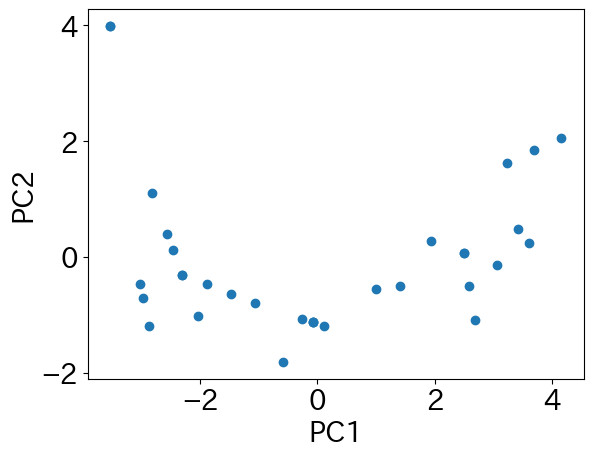

In [14]:
# PCAを実行
pca = PCA(n_components=2, random_state=CFG.random_seed)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

# X_train_pcaをDataFrameに変換
train_pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])

# train_pca_dfの散布図を描画
plt.scatter(train_pca_df["PC1"], train_pca_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## PCAで説明変数を2次元に圧縮し可視化&各水準のIDを表示

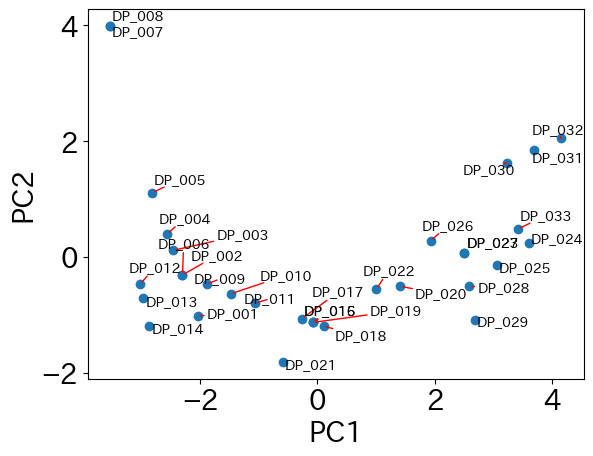

In [15]:
# PCAを実行
pca = PCA(n_components=2, random_state=CFG.random_seed)
X_train_pca = pca.fit_transform(X_train)

# X_train_pcaをDataFrameに変換
train_pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])

# train_pca_dfの散布図を描画
plt.scatter(train_pca_df["PC1"], train_pca_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_pca_df["PC1"][i],
        train_pca_df["PC2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_pca_df))
]
np.random.seed(CFG.random_seed)
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

In [16]:
# 固有ベクトル（主成分軸の方向）
eigenvectors = pca.components_
eigenvectors

array([[-0.29330393, -0.35787624,  0.3585883 , -0.30351458,  0.33035922,
         0.17429533, -0.10202347, -0.10202347, -0.09866522,  0.21526474,
         0.29537781, -0.14067964,  0.        ,  0.        ,  0.34869216,
         0.34663859, -0.        , -0.        ],
       [ 0.1572618 , -0.15136317,  0.14922791, -0.20376555,  0.13086144,
        -0.5599298 ,  0.38610244,  0.38610244, -0.31928377,  0.31529548,
        -0.0839621 , -0.14575958, -0.        , -0.        , -0.12267784,
        -0.12277444,  0.        ,  0.        ]])

In [17]:
# 固有値（各主成分の分散）
eigenvalues = pca.explained_variance_
eigenvalues

array([6.30834348, 1.8846959 ])

In [18]:
# 寄与率（各主成分が元のデータの分散をどれだけ説明しているか）
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.43694154, 0.13054171])

In [19]:
# 累積寄与率（全主成分の合計でどれだけの分散を説明できているか）
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.43694154, 0.56748325])

In [20]:
# 主成分負荷量（元々の各特徴量が主成分にどの程度寄与しているかを示す係数）
loadings = eigenvectors.T * np.sqrt(eigenvalues)
loadings

array([[-0.73667436,  0.21589564],
       [-0.89885685, -0.20779775],
       [ 0.9006453 ,  0.20486639],
       [-0.76231985, -0.27973795],
       [ 0.82974395,  0.17965212],
       [ 0.4377674 , -0.76869529],
       [-0.25624638,  0.53005775],
       [-0.25624638,  0.53005775],
       [-0.24781166, -0.43832625],
       [ 0.54066787,  0.43285097],
       [ 0.74188318, -0.11526672],
       [-0.35333684, -0.20010491],
       [ 0.        , -0.        ],
       [ 0.        , -0.        ],
       [ 0.87578973, -0.16841732],
       [ 0.8706319 , -0.16854994],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ]])

In [21]:
# 主成分負荷量をデータフレーム化
loading_df = pd.DataFrame(loadings, index=numeric_parameter_cols, columns=["PC1_Loadings", "PC2_Loadings"])
loading_df

,PC1_Loadings,PC2_Loadings
材料１,-0.736674,0.215896
材料２,-0.898857,-0.207798
材料３,0.900645,0.204866
材料４,-0.762320,-0.279738
材料５,0.829744,0.179652
材料６,0.437767,-0.768695
材料７,-0.256246,0.530058
材料８,-0.256246,0.530058
材料９,-0.247812,-0.438326
材料１０,0.540668,0.432851


In [22]:
# 主成分負荷量を大きい順にソート
loading_df_sorted_pc1_loadings = loading_df["PC1_Loadings"].sort_values(ascending=False)
loading_df_sorted_pc2_loadings = loading_df["PC2_Loadings"].sort_values(ascending=False)

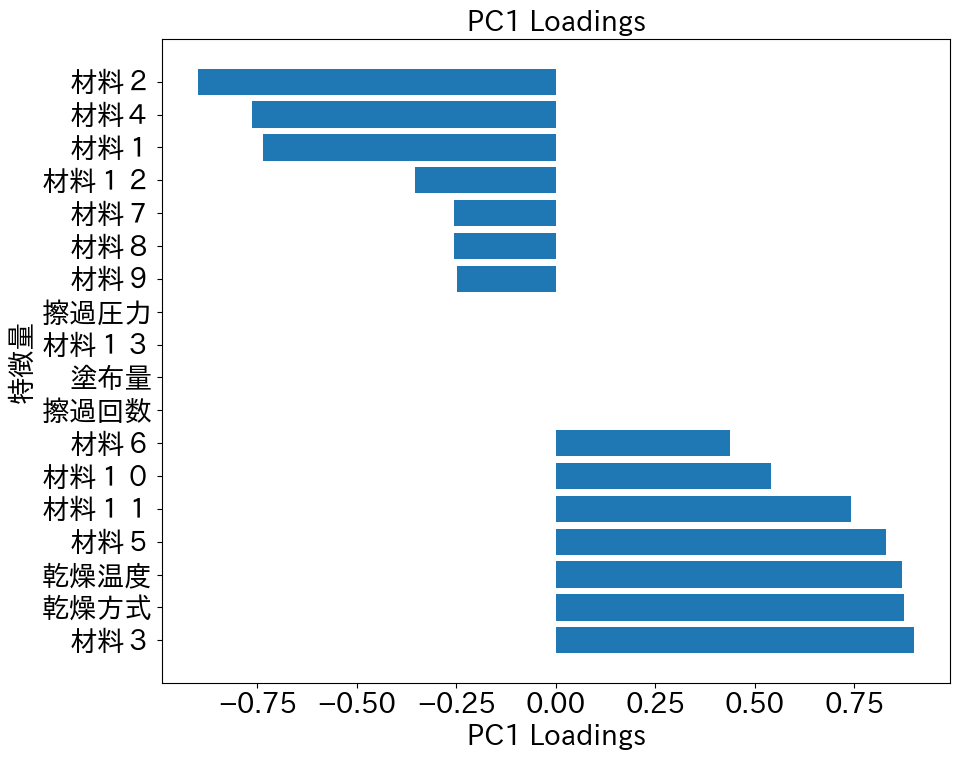

In [23]:
# 主成分負荷量（主成分1）をプロット
plt.figure(figsize=(10, 8))
plt.barh(loading_df_sorted_pc1_loadings.index, loading_df_sorted_pc1_loadings)
plt.ylabel("特徴量")
plt.xlabel("PC1 Loadings")
plt.title("PC1 Loadings")
plt.tight_layout()
plt.show()

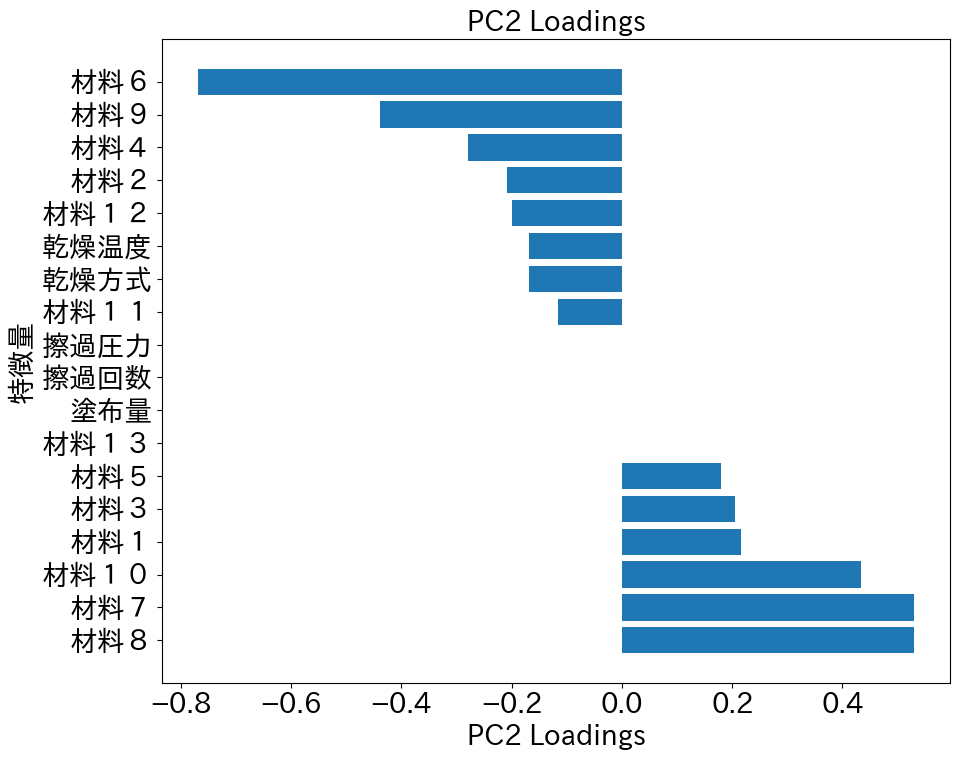

In [24]:
# 主成分負荷量（主成分2）をプロット
plt.figure(figsize=(10, 8))
plt.barh(loading_df_sorted_pc2_loadings.index, loading_df_sorted_pc2_loadings)
plt.ylabel("特徴量")
plt.xlabel("PC2 Loadings")
plt.title("PC2 Loadings")
plt.tight_layout()
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=5）

In [25]:
def perform_tsne(X_train, perplexity=30, random_seed=42):
    # t-SNE を実行
    # perplexityのデフォルト値は30であるが、perplexity must be less than n_samplesからデフォルトだと今回はエラーになるため注意
    tsne = TSNE(n_components=2, random_state=random_seed, perplexity=perplexity)
    X_train_tsne = tsne.fit_transform(X_train)

    # DataFrame に変換
    train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

    # 散布図を描画
    plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"], alpha=0.7)
    plt.xlabel("t-SNE1")
    plt.ylabel("t-SNE2")
    plt.show()

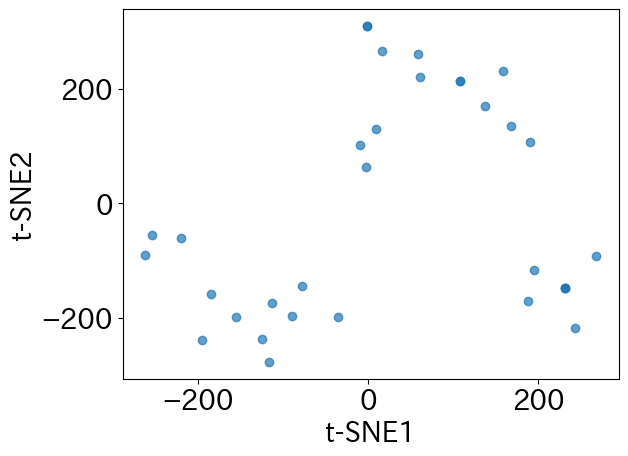

In [26]:
perform_tsne(X_train, perplexity=5, random_seed=CFG.random_seed)

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=5）&各水準のIDを表示

In [27]:
def perform_tsne_with_id(X_train, perplexity=30, random_seed=42):
    # t-SNE を実行
    # perplexityのデフォルト値は30であるが、perplexity must be less than n_samplesからデフォルトだと今回はエラーになるため注意
    tsne = TSNE(n_components=2, random_state=random_seed, perplexity=perplexity)
    X_train_tsne = tsne.fit_transform(X_train)

    # DataFrame に変換
    train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

    # 散布図を描画
    plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"], alpha=0.7)
    plt.xlabel("t-SNE1")
    plt.ylabel("t-SNE2")

    # plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
    texts = [
        plt.text(
            train_tsne_df["t-SNE1"][i],
            train_tsne_df["t-SNE2"][i],
            train_df["サンプルID"][i],
            fontsize=10,
        )
        for i in range(len(train_tsne_df))
    ]
    np.random.seed(CFG.random_seed)
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
    plt.show()

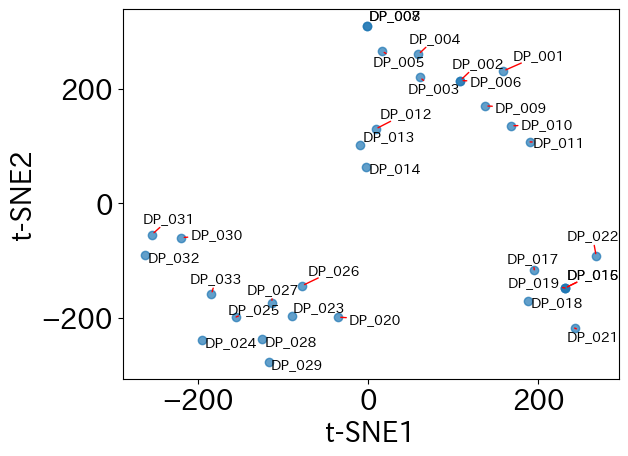

In [28]:
perform_tsne_with_id(X_train, perplexity=5, random_seed=CFG.random_seed)

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=10）

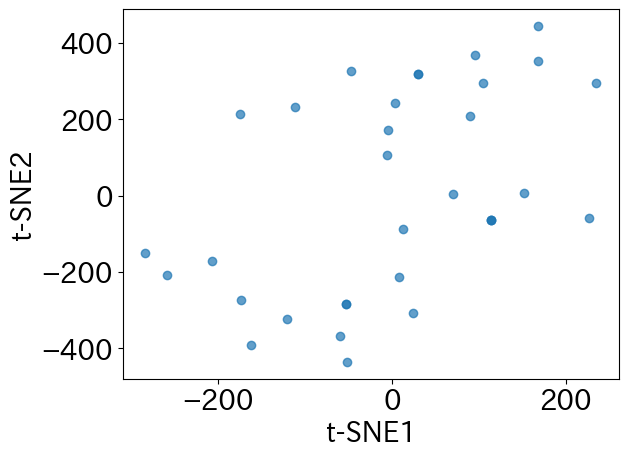

In [29]:
perform_tsne(X_train, perplexity=10, random_seed=CFG.random_seed)

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=10）&各水準のIDを表示

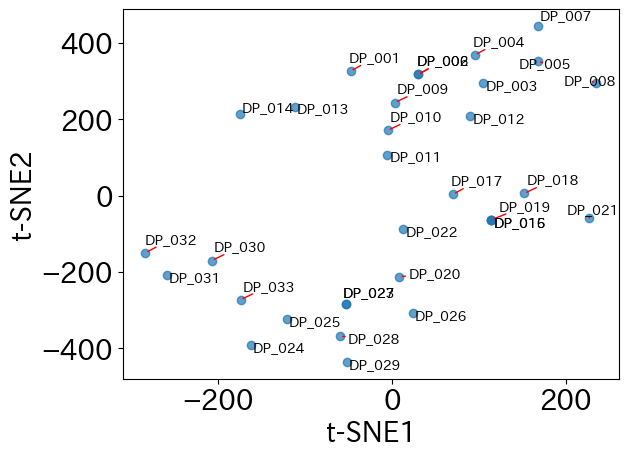

In [30]:
perform_tsne_with_id(X_train, perplexity=10, random_seed=CFG.random_seed)

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=20）

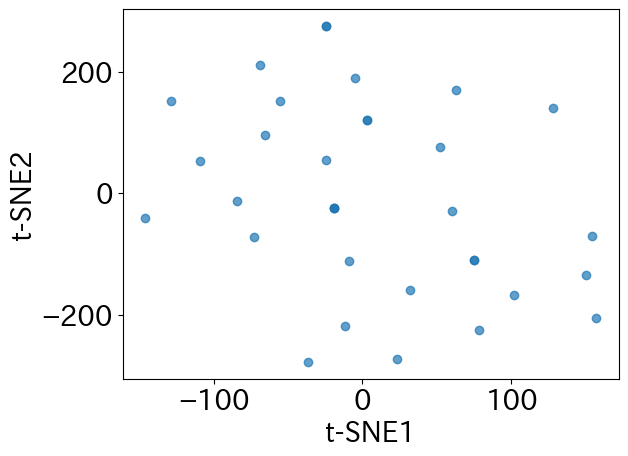

In [31]:
perform_tsne(X_train, perplexity=20, random_seed=CFG.random_seed)

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=20）&各水準のIDを表示

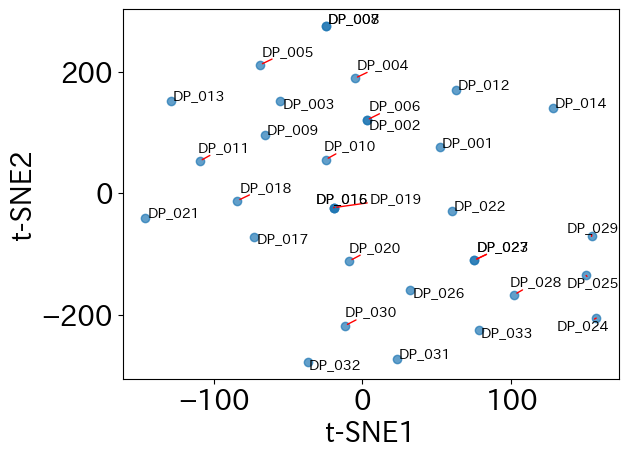

In [32]:
perform_tsne_with_id(X_train, perplexity=20, random_seed=CFG.random_seed)

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=15）

In [33]:
def perform_umap(X_train, n_neighbors=15, random_seed=42):
    # UMAP を実行
     # n_neighborsのデフォルト値は15
    umap_ = umap.UMAP(n_components=2, random_state=random_seed, n_neighbors=n_neighbors)
    X_train_umap = umap_.fit_transform(X_train)

    # DataFrame に変換
    train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

    # 散布図を描画
    plt.figure(figsize=(6, 5))
    plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"], alpha=0.7)
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.show()

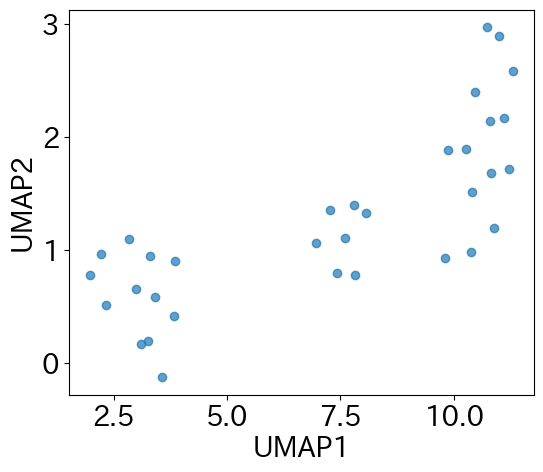

In [34]:
perform_umap(X_train, n_neighbors=15, random_seed=CFG.random_seed)

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=15）&各水準のIDを表示

In [35]:
def perform_umap_with_id(X_train, n_neighbors=15, random_seed=42):
    # UMAP を実行
     # n_neighborsのデフォルト値は15
    umap_ = umap.UMAP(n_components=2, random_state=random_seed, n_neighbors=n_neighbors)
    X_train_umap = umap_.fit_transform(X_train)

    # DataFrame に変換
    train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

    # 散布図を描画
    plt.figure(figsize=(6, 5))
    plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"], alpha=0.7)
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")

    # plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
    texts = [
        plt.text(
            train_umap_df["UMAP1"][i],
            train_umap_df["UMAP2"][i],
            train_df["サンプルID"][i],
            fontsize=10,
        )
        for i in range(len(train_umap_df))
    ]
    np.random.seed(CFG.random_seed)
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
    plt.show()

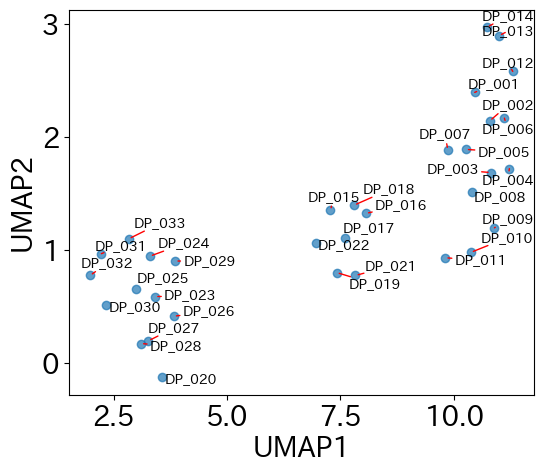

In [36]:
perform_umap_with_id(X_train, n_neighbors=15, random_seed=CFG.random_seed)

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=5）

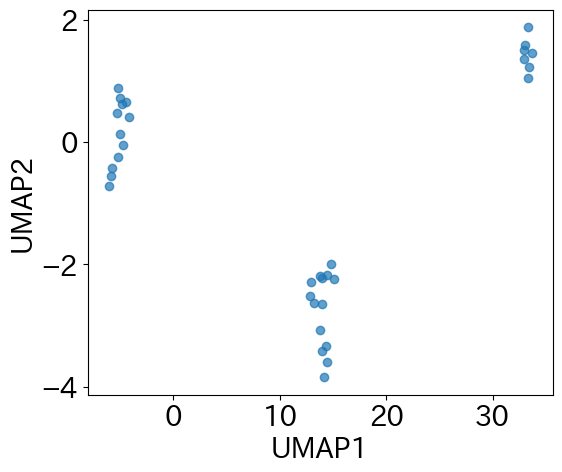

In [37]:
perform_umap(X_train, n_neighbors=5, random_seed=CFG.random_seed)

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=5）&各水準のIDを表示

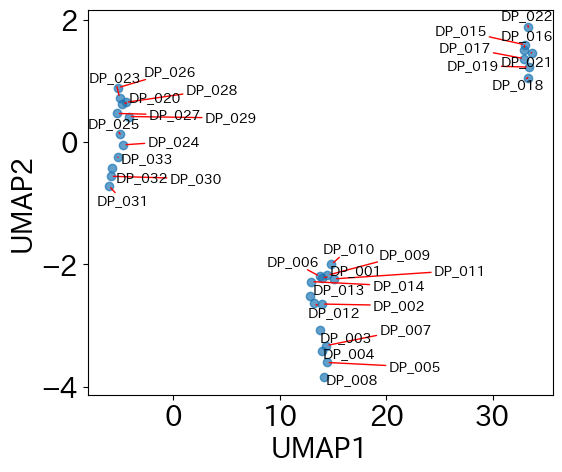

In [38]:
perform_umap_with_id(X_train, n_neighbors=5, random_seed=CFG.random_seed)

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=30）

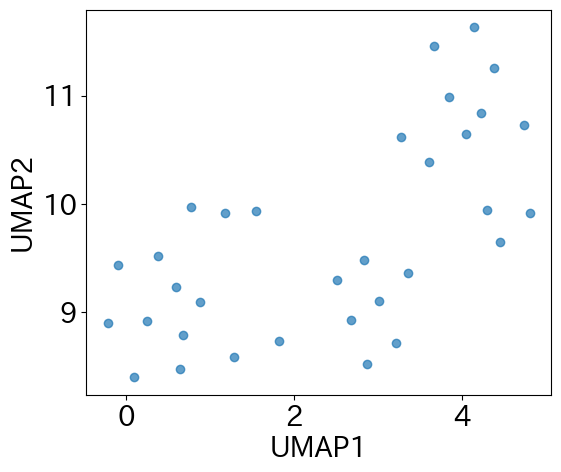

In [39]:
perform_umap(X_train, n_neighbors=30, random_seed=CFG.random_seed)

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=30）&各水準のIDを表示

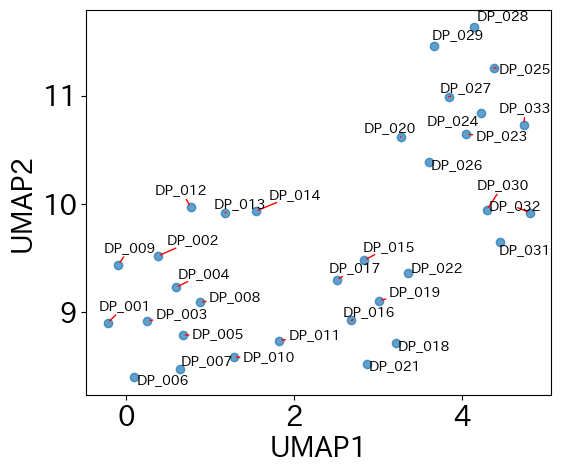

In [40]:
perform_umap_with_id(X_train, n_neighbors=30, random_seed=CFG.random_seed)

## 説明変数を2次元に圧縮した可視化に目的変数のカラープロットを組み合わせる（UMAPを例に）

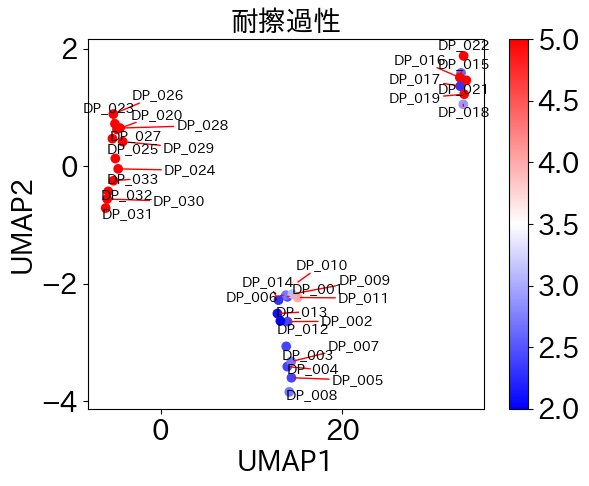

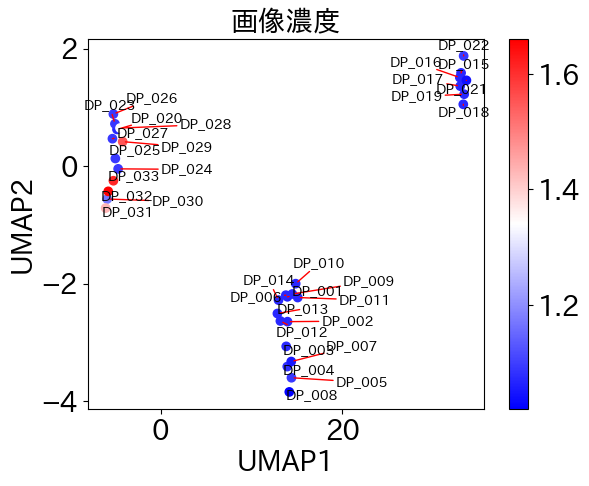

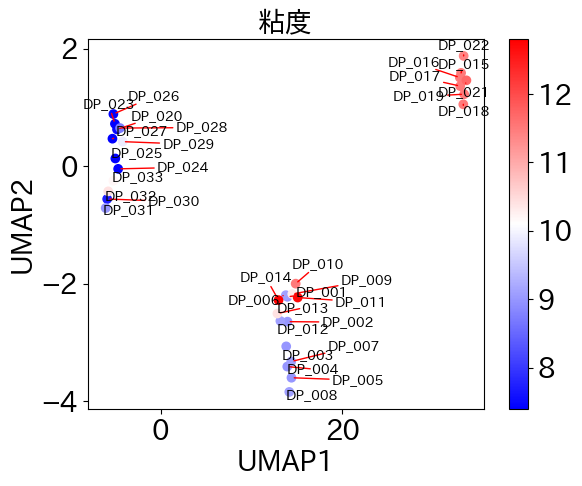

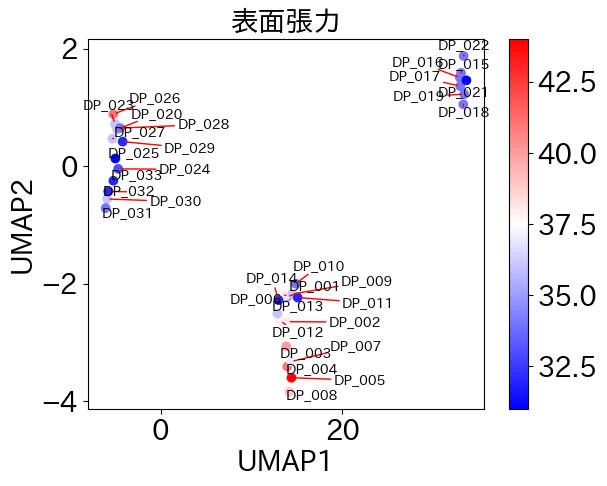

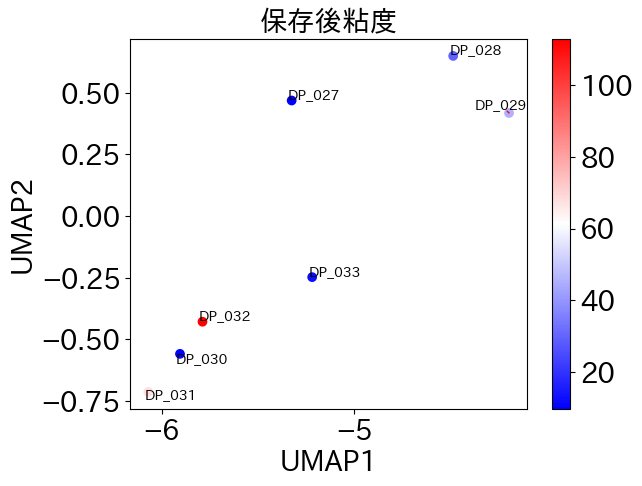

In [41]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

plot_df = pd.concat([train_umap_df, train_df], axis=1)

for col in objective_cols:
    # train_umap_dfの散布図を描画
    plot_df_dropna = plot_df.dropna(subset=col).reset_index(drop=True)

    plt.scatter(
        plot_df_dropna["UMAP1"],
        plot_df_dropna["UMAP2"],
        c=plot_df_dropna[col],
        cmap=plt.colormaps["bwr"],
    )
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    # plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
    texts = [
        plt.text(
            plot_df_dropna["UMAP1"][i],
            plot_df_dropna["UMAP2"][i],
            plot_df_dropna["サンプルID"][i],
            fontsize=10,
        )
        for i in range(len(plot_df_dropna))
    ]
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
    plt.colorbar()
    plt.title(col)
    plt.show()

## 階層的クラスタリング（ウォード法）

In [42]:
# ウォード法の実行
linked_scaled = linkage(X_train, method='ward')

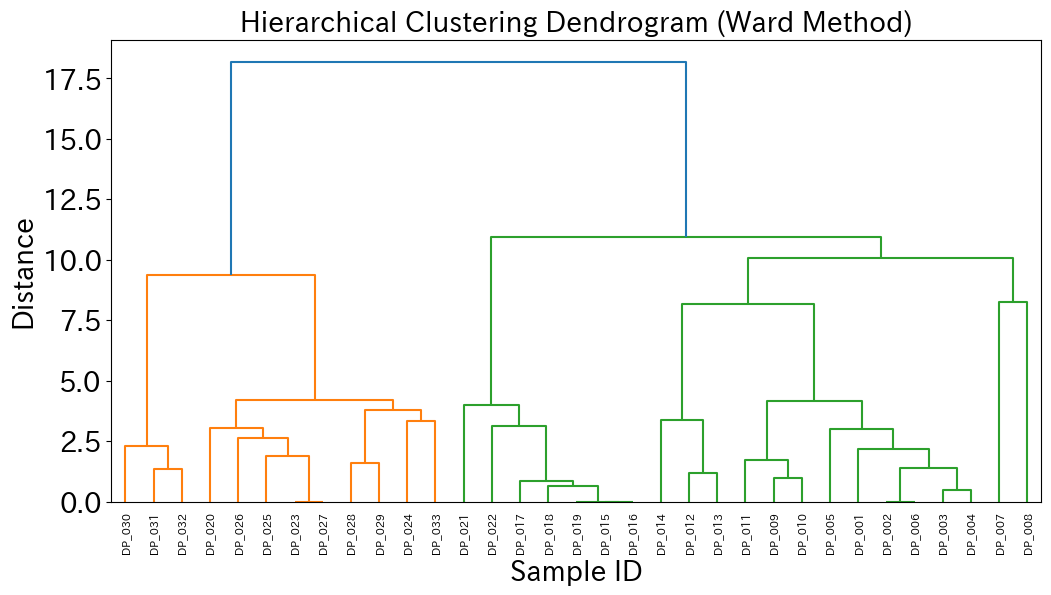

In [43]:
# デンドログラムの描画（サンプルIDをラベルとして表示）
plt.figure(figsize=(12, 6))
dendrogram(linked_scaled, labels=train_df["サンプルID"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Sample ID")
plt.ylabel("Distance")
plt.show()

## 非階層的クラスタリング（k-means法）

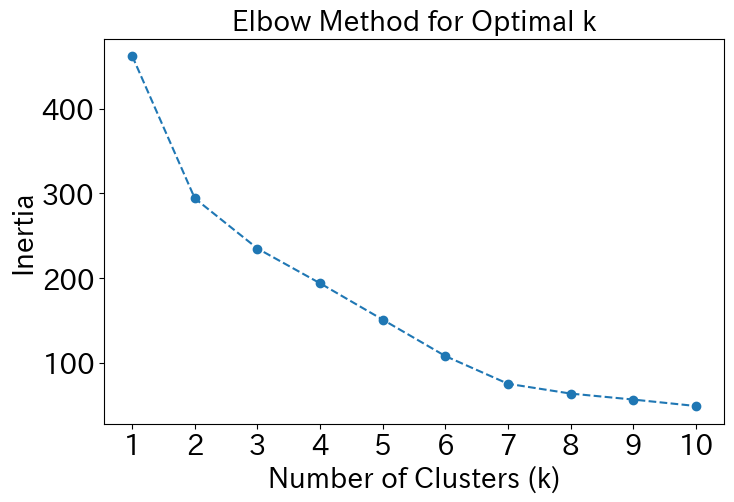

In [44]:
# エルボー法による適切なクラスタ数の決定
inertia = []
K_range = range(1, 11)  # k=1～10の範囲で試行

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=CFG.random_seed, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# エルボー法の結果をプロット
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.show()

In [45]:
# K-meansクラスタリングを実施
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=CFG.random_seed)
clusters_kmeans = kmeans.fit_predict(X_train)
clusters_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

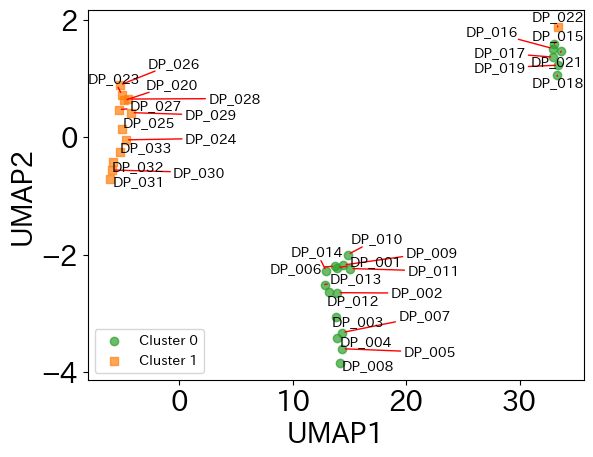

In [46]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])
train_umap_df["Cluster"] = clusters_kmeans  # クラスタ情報を追加

# train_umap_dfの散布図を描画（クラスタごとに色分け）
colormap = ["tab:green", "tab:orange"]
markers = ["o", "s", "D"]

for cluster in range(n_clusters):
    cluster_points = train_umap_df[train_umap_df["Cluster"] == cluster]
    plt.scatter(
        cluster_points["UMAP1"],
        cluster_points["UMAP2"],
        color=colormap[cluster],  # クラスタごとの色
        marker=markers[cluster],  # クラスタごとのマーカー
        label=f'Cluster {cluster}',
        alpha=0.7
    )

plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(fontsize=10)

# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
np.random.seed(CFG.random_seed)
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## 実行環境のライブラリverを保存

In [47]:
# Pythonのverを確認
!python3 -V

Python 3.11.12


In [48]:
!pip freeze > requirements_eda.txt

In [49]:
from google.colab import files

files.download('requirements_eda.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>